# xPts: Expected Points | Liga Portugal 24/25

(updated as of 17th April 2025)

In this notebook, we will model and plot an expected points league table for Liga Portugal 24/25 (updated as of Matchday 29), using Poisson distribution.

Expected Points = (3×𝑃win) + (1×𝑃draw) + (0×𝑃loss)
Expected Points are estimated considering each team's xG for a given game. The team whose xG is higher for a given game will receive the 3 points, 0 points for the losing team, and 1 point for each if they tie.


## Imports

In [27]:
# imports
import locale
import os
import sys

import numpy as np
import pandas as pd
import soccerdata as sd
from scipy.stats import poisson

%matplotlib inline
import urllib

import matplotlib
import matplotlib.pyplot as plt
from highlight_text import fig_text
from PIL import Image
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

sys.path.append(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Analysis Tools"
)
import function_town as ft

## Set Functions


In [2]:
def calculate_points(Home_Score, Away_Score):
    if Home_Score > Away_Score:
        return 3, 0  # home wins
    elif Home_Score == Away_Score:
        return 1, 1  # draw
    else:
        return 0, 3  # away wins


def calculate_xp(Home_xG, Away_xG):
    prob_home_win = 0
    prob_draw = 0
    prob_away_win = 0

    for x in range(10):  # simulate local goals
        for y in range(10):  # simulate away goals
            value = round(
                poisson.pmf(x, Home_xG) * poisson.pmf(y, Away_xG) * 100, 3
            )  # poisson result
            if x > y:  # home win prob
                prob_home_win += value
            elif x == y:  # draw prob
                prob_draw += value
            else:  # away win prob
                prob_away_win += value

    Home_xP = (prob_home_win / 100) * 3 + (prob_draw / 100)
    Away_xP = (prob_away_win / 100) * 3 + (prob_draw / 100)

    return [round(Home_xP, 2), round(Away_xP, 2)]


def compute_xp_and_points(row):
    Home_xP, Away_xP = calculate_xp(
        row["Home Expected Goals(xG)"], row["Away Expected Goals(xG)"]
    )
    Home_Points, Away_Points = calculate_points(row["Home Score"], row["Away Score"])

    return pd.Series(
        {
            "Home_xPts": Home_xP,
            "Away_xPts": Away_xP,
            "Home_Points": Home_Points,
            "Away_Points": Away_Points,
        }
    )

## Data Loading and Engineering


The raw data below was generated by the scraping logic in ``Opta_Team_Performance_Metrics_FotMob_UEFA_Top8_Leagues.py`` (*see* [Data Scraping & Engineering folder](https://github.com/Vitor-Neves48/portfolio-football-analytics/tree/main/Data%20Scraping%20%26%20Engineering)), and relies solely on the dependencies declared within that script.

No scraped datasets are stored in this repository—they’re created on‑the‑fly for educational purposes only and will not be redistributed.

All required packages and modules are listed directly in the Python file to ensure reproducibility and clarity

All functions called using the ``ft`` prefix were created by me as tools for **Data Cleaning/Engineering**, and are stored in ``function_town.py`` (*see* [Analysis Tools folder](https://github.com/Vitor-Neves48/portfolio-football-analytics/tree/main/Analysis%20Tools)). Explanations on each functions' purpose and logic are provided their docstring.

In [3]:
raw_df = pd.read_parquet(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\data\raw_all_team_stats\FotMob_all_team_stats_PRT-Liga Portugal_2024-2025.parquet"
) # Change as needed

df = ft.clean_FotMob_all_team_stats_df(raw_df, "PRT-Liga Portugal", "2024/2025")
display(df)
print(df.columns)

[04/18/25 19:40:01] WARNING  C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Analysis    ]8;id=479987;file://c:\Users\Vitor\anaconda3\Lib\warnings.py\warnings.py]8;;\:]8;id=857493;file://c:\Users\Vitor\anaconda3\Lib\warnings.py#109\109]8;;\
                             Tools\function_town.py:1283: SettingWithCopyWarning:                                  
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               Home_df.rename(columns=home_rename, inplace=True)                                   
                                                                                                                   

                    WARNING  C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Analysis    ]8;id=167316;file://c:\Users\Vitor\anaconda3\Lib\warnings.py\warnings.py]8;;\:]8;id=92146;file://c:\Users\Vitor\anaconda3\Lib\warnings.py#109\109]8;;\
                             Tools\function_town.py:1284: SettingWithCopyWarning:                                  
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               Away_df.rename(columns=away_rename, inplace=True)                                   
                                                                                                                   

[4/18/2025 7:40:01 PM] INFO     Saving cached data to C:\Users\Vitor\soccerdata\data\FotMob          ]8;id=42215;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=232501;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

,League,Season,Game Id,Round,Match Date,Matchup,Home Team,Home Score,Away Score,Away Team,...,Away Successful Dribbles(%),Away Red Cards,Away Yellow Cards,Away Big Chances Missed,Away Corners,Away Ball Possession,Away Fouls Committed,Away Big Chances,Home Team Badge,Away Team Badge
0,PRT-Liga Portugal,24/25,4539021,1,2024-08-09,Sporting CP-Rio Ave,Sporting CP,3,1,Rio Ave,...,0.16,0.0,2.0,0.0,1.0,41.0,14.0,1.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
1,PRT-Liga Portugal,24/25,4539022,1,2024-08-10,FC Porto-Gil Vicente,FC Porto,3,0,Gil Vicente,...,0.23,1.0,1.0,0.0,2.0,29.0,10.0,0.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
2,PRT-Liga Portugal,24/25,4539020,1,2024-08-10,Casa Pia AC-Boavista,Casa Pia AC,0,1,Boavista,...,0.10,0.0,1.0,1.0,1.0,33.0,6.0,2.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
3,PRT-Liga Portugal,24/25,4539018,1,2024-08-10,AVS Futebol SAD-Nacional,AVS Futebol SAD,1,1,Nacional,...,0.50,0.0,1.0,0.0,2.0,46.0,13.0,1.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
4,PRT-Liga Portugal,24/25,4539015,1,2024-08-11,Braga-Estrela da Amadora,Braga,1,1,Estrela da Amadora,...,0.54,0.0,5.0,1.0,4.0,35.0,9.0,1.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,PRT-Liga Portugal,24/25,4539324,29,2025-04-12,Boavista-Nacional,Boavista,0,1,Nacional,...,0.60,0.0,4.0,3.0,7.0,48.0,12.0,4.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
257,PRT-Liga Portugal,24/25,4539320,29,2025-04-13,Benfica-Arouca,Benfica,2,2,Arouca,...,0.31,0.0,3.0,1.0,5.0,45.0,12.0,3.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
258,PRT-Liga Portugal,24/25,4539323,29,2025-04-13,Braga-AVS Futebol SAD,Braga,4,1,AVS Futebol SAD,...,0.55,0.0,2.0,0.0,3.0,36.0,8.0,1.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...
259,PRT-Liga Portugal,24/25,4539327,29,2025-04-13,Moreirense-Rio Ave,Moreirense,0,2,Rio Ave,...,0.71,0.0,5.0,0.0,2.0,52.0,26.0,1.0,C:\Users\Vitor\Desktop\Football Data Analytics...,C:\Users\Vitor\Desktop\Football Data Analytics...


Index(['League', 'Season', 'Game Id', 'Round', 'Match Date', 'Matchup',
       'Home Team', 'Home Score', 'Away Score', 'Away Team',
       'Home Blocked Shots', 'Home Hit Woodwork', 'Home Shots Inside Box',
       'Home Shots Off Target', 'Home Shots On Target',
       'Home Shots Outside Box', 'Home Total Shots', 'Home Expected Goals(xG)',
       'Home xG Non-Penalty', 'Home xG On Target(Xgot)', 'Home xG Open Play',
       'Home xG Set Play', 'Home Accurate Crosses', 'Home Accurate Long Balls',
       'Home Accurate Passes', 'Home Offsides', 'Home Opposition Half',
       'Home Own Half', 'Home Passes', 'Home Throws',
       'Home Touches In Opposition Box', 'Home Accurate Crosses(%)',
       'Home Accurate Long Balls(%)', 'Home Accurate Passes(%)', 'Home Blocks',
       'Home Clearances', 'Home Interceptions', 'Home Keeper Saves',
       'Home Tackles Won', 'Home Tackles Won(%)', 'Home Aerial Duels Won',
       'Home Duels Won', 'Home Ground Duels Won', 'Home Successful Dribbles',
 

In [4]:
# Keep these columns
columns_to_keep = [
    "League",
    "Season",
    "Game Id",
    "Round",
    "Home Team",
    "Home Expected Goals(xG)",
    "Away Expected Goals(xG)",
    "Away Team",
    "Home Score",
    "Away Score",
]
df = df[columns_to_keep]

# apply the function to each row and assign the results to new columns
df[["Home_xPts", "Away_xPts", "Home_Points", "Away_Points"]] = df.apply(
    compute_xp_and_points, axis=1
)

df.head(10)

,League,Season,Game Id,Round,Home Team,Home Expected Goals(xG),Away Expected Goals(xG),Away Team,Home Score,Away Score,Home_xPts,Away_xPts,Home_Points,Away_Points
0,PRT-Liga Portugal,24/25,4539021,1,Sporting CP,3.00,0.46,Rio Ave,3,1,2.71,0.19,3.0,0.0
1,PRT-Liga Portugal,24/25,4539022,1,FC Porto,3.47,0.10,Gil Vicente,3,0,2.90,0.05,3.0,0.0
2,PRT-Liga Portugal,24/25,4539020,1,Casa Pia AC,0.92,1.15,Boavista,0,1,1.17,1.53,0.0,3.0
3,PRT-Liga Portugal,24/25,4539018,1,AVS Futebol SAD,1.01,0.52,Nacional,1,1,1.75,0.90,1.0,1.0
4,PRT-Liga Portugal,24/25,4539015,1,Braga,1.41,0.69,Estrela da Amadora,1,1,1.90,0.82,1.0,1.0
5,PRT-Liga Portugal,24/25,4539019,1,Famalicao,1.47,0.78,Benfica,2,0,1.87,0.86,3.0,0.0
6,PRT-Liga Portugal,24/25,4539023,1,Estoril,0.15,2.72,Santa Clara,1,4,0.12,2.80,0.0,3.0
7,PRT-Liga Portugal,24/25,4539017,1,Farense,1.40,2.20,Moreirense,1,2,0.92,1.87,0.0,3.0
8,PRT-Liga Portugal,24/25,4539016,1,Arouca,0.21,0.83,Vitoria de Guimaraes,0,1,0.69,1.90,0.0,3.0
9,PRT-Liga Portugal,24/25,4539206,2,Santa Clara,0.75,1.11,FC Porto,0,2,1.05,1.63,0.0,3.0


Creating a Home dataset.

In [5]:
df_home = df[["Home Team", "Home_xPts", "Home_Points"]]
df_home = df_home.groupby(["Home Team"]).sum()
df_home

,Home_xPts,Home_Points
Home Team,,
AVS Futebol SAD,13.63,14.0
Arouca,16.03,14.0
Benfica,34.74,40.0
Boavista,16.74,6.0
Braga,28.32,30.0
Casa Pia AC,21.25,25.0
Estoril,16.48,22.0
Estrela da Amadora,16.31,16.0
FC Porto,30.70,33.0


Creating an Away dataset.

In [6]:
df_away = df[["Away Team", "Away_xPts", "Away_Points"]]
df_away = df_away.groupby(["Away Team"]).sum()
df_away

,Away_xPts,Away_Points
Away Team,,
AVS Futebol SAD,14.73,9.0
Arouca,18.91,16.0
Benfica,28.72,29.0
Boavista,13.05,12.0
Braga,20.00,30.0
Casa Pia AC,13.35,15.0
Estoril,13.80,17.0
Estrela da Amadora,12.81,10.0
FC Porto,24.42,26.0


Bringing both together.

In [7]:
# perform an inner join between df_home and df_away
df_result = pd.concat([df_home, df_away], axis=1, join="inner").round(2)

# calculate new columns
df_result["Points"] = df_result["Home_Points"] + df_result["Away_Points"]
df_result["xPts"] = df_result["Home_xPts"] + df_result["Away_xPts"]
df_result["Pts-xPts"] = df_result["Points"] - df_result["xPts"]


df_result["Points"] = df_result["Points"].round(2)
df_result["xPts"] = df_result["xPts"].round(2)
df_result["Pts-xPts"] = df_result["Pts-xPts"].round(2)
# select only the new columns
df_result = df_result[["Points", "xPts", "Pts-xPts"]]
df_result.reset_index(inplace=True)
df_result.rename(columns={"index": "Team"}, inplace=True)
df_result

,Team,Points,xPts,Pts-xPts
0,AVS Futebol SAD,23.0,28.36,-5.36
1,Arouca,30.0,34.94,-4.94
2,Benfica,69.0,63.46,5.54
3,Boavista,18.0,29.79,-11.79
4,Braga,60.0,48.32,11.68
5,Casa Pia AC,40.0,34.60,5.40
6,Estoril,39.0,30.28,8.72
7,Estrela da Amadora,26.0,29.12,-3.12
8,FC Porto,59.0,55.12,3.88
9,Famalicao,43.0,39.36,3.64


Example: sorting by points to obtain the actual standings.


In [8]:
df_result.sort_values(by=["Points"], ascending=False)

,Team,Points,xPts,Pts-xPts
2,Benfica,69.0,63.46,5.54
16,Sporting CP,69.0,64.02,4.98
4,Braga,60.0,48.32,11.68
8,FC Porto,59.0,55.12,3.88
17,Vitoria de Guimaraes,48.0,49.01,-1.01
15,Santa Clara,46.0,45.43,0.57
9,Famalicao,43.0,39.36,3.64
5,Casa Pia AC,40.0,34.60,5.40
6,Estoril,39.0,30.28,8.72
12,Moreirense,35.0,35.91,-0.91


Example: sorting by xPts to get the expected points standings.


In [9]:
df_result.sort_values(by=["xPts"], ascending=False)

,Team,Points,xPts,Pts-xPts
16,Sporting CP,69.0,64.02,4.98
2,Benfica,69.0,63.46,5.54
8,FC Porto,59.0,55.12,3.88
17,Vitoria de Guimaraes,48.0,49.01,-1.01
4,Braga,60.0,48.32,11.68
15,Santa Clara,46.0,45.43,0.57
9,Famalicao,43.0,39.36,3.64
12,Moreirense,35.0,35.91,-0.91
14,Rio Ave,32.0,35.00,-3.00
1,Arouca,30.0,34.94,-4.94


Creating a second dataset, containing League Table stats **and** more advanced team performance metrics. (I reccomend exploring `join_league_table_stats_to_sum_advanced_all_team` in [function_town.py](https://github.com/Vitor-Neves48/portfolio-football-analytics/tree/main/Analysis%20Tools)).

In [11]:
df2 = ft.join_league_table_stats_to_sum_advanced_all_team(
    raw_df, "PRT-Liga Portugal", "2024/2025"
)
df2

[4/18/2025 7:46:04 PM] INFO     Saving cached data to C:\Users\Vitor\soccerdata\data\FotMob          ]8;id=754975;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=213773;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

,League,Season,Match Date,Team,Mp,W,D,L,Gf,Ga,...,Ground Duels Won(%),Successful Dribbles(%),Red Cards,Yellow Cards,Big Chances Missed,Corners,Ball Possession,Fouls Committed,Big Chances,Badge
0,PRT-Liga Portugal,24/25,2024-08-09,Rio Ave,30,8,9,13,33,48,...,14.67,13.79,5.0,63.0,29.0,120.0,1386.0,396.0,50.0,C:\Users\Vitor\Desktop\Football Data Analytics...
1,PRT-Liga Portugal,24/25,2024-08-09,Sporting CP,29,21,6,2,75,24,...,15.39,14.52,6.0,50.0,59.0,185.0,1766.0,328.0,111.0,C:\Users\Vitor\Desktop\Football Data Analytics...
2,PRT-Liga Portugal,24/25,2024-08-10,AVS Futebol SAD,29,4,11,14,22,48,...,14.48,12.49,4.0,76.0,36.0,97.0,1266.0,398.0,51.0,C:\Users\Vitor\Desktop\Football Data Analytics...
3,PRT-Liga Portugal,24/25,2024-08-10,Nacional,29,9,5,15,27,38,...,14.62,14.13,3.0,70.0,38.0,122.0,1363.0,397.0,52.0,C:\Users\Vitor\Desktop\Football Data Analytics...
4,PRT-Liga Portugal,24/25,2024-08-10,Gil Vicente,29,6,8,15,27,43,...,15.10,12.31,5.0,60.0,35.0,114.0,1506.0,330.0,51.0,C:\Users\Vitor\Desktop\Football Data Analytics...
5,PRT-Liga Portugal,24/25,2024-08-10,FC Porto,30,19,5,6,57,26,...,13.64,11.95,2.0,81.0,66.0,157.0,1790.0,408.0,102.0,C:\Users\Vitor\Desktop\Football Data Analytics...
6,PRT-Liga Portugal,24/25,2024-08-10,Boavista,30,5,6,19,20,47,...,15.06,13.20,9.0,72.0,30.0,106.0,1130.0,363.0,45.0,C:\Users\Vitor\Desktop\Football Data Analytics...
7,PRT-Liga Portugal,24/25,2024-08-10,Casa Pia AC,29,11,7,11,34,37,...,14.46,14.47,3.0,72.0,26.0,118.0,1357.0,433.0,49.0,C:\Users\Vitor\Desktop\Football Data Analytics...
8,PRT-Liga Portugal,24/25,2024-08-11,Estoril,29,10,9,10,38,46,...,13.41,12.21,1.0,75.0,32.0,109.0,1413.0,466.0,57.0,C:\Users\Vitor\Desktop\Football Data Analytics...
9,PRT-Liga Portugal,24/25,2024-08-11,Estrela da Amadora,29,6,8,15,22,42,...,14.94,14.27,3.0,81.0,26.0,117.0,1288.0,451.0,39.0,C:\Users\Vitor\Desktop\Football Data Analytics...


Preparing the df used to create the visualization.

In [14]:
df_plot = pd.merge(df2, df_result, on="Team", how="left")
df_plot.drop(columns="Pts", inplace=True)

locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
ws = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2024/2025", no_cache=False, no_store=False
)
league_table = ws.read_league_table()
# Fetch the order of 'Team' from another DataFrame (df_order)
team_order = league_table["team"].tolist()  # Convert the 'Team' column to a list
# Reorder df_plot based on the 'Team' order from df_order
df_plot = df_plot.set_index("Team").reindex(team_order).reset_index()
# Create 'Rank' column based on the index order
df_plot["Rank"] = range(1, len(df_plot) + 1)
# Reorder columns to make 'Rank' the first column
df_plot = df_plot[["Rank"] + [col for col in df_plot.columns if col != "Rank"]]
# Show the updated df_plot
display(df_plot)
print(df_plot.columns)


[4/18/2025 7:48:36 PM] INFO     Saving cached data to C:\Users\Vitor\soccerdata\data\FotMob          ]8;id=250689;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=638679;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

,Rank,Team,League,Season,Match Date,Mp,W,D,L,Gf,...,Yellow Cards,Big Chances Missed,Corners,Ball Possession,Fouls Committed,Big Chances,Badge,Points,xPts,Pts-xPts
0,1,Sporting CP,PRT-Liga Portugal,24/25,2024-08-09,29,21,6,2,75,...,50.0,59.0,185.0,1766.0,328.0,111.0,C:\Users\Vitor\Desktop\Football Data Analytics...,69.0,64.02,4.98
1,2,Benfica,PRT-Liga Portugal,24/25,2024-08-11,29,22,3,4,71,...,52.0,72.0,211.0,1714.0,332.0,121.0,C:\Users\Vitor\Desktop\Football Data Analytics...,69.0,63.46,5.54
2,3,FC Porto,PRT-Liga Portugal,24/25,2024-08-10,30,19,5,6,57,...,81.0,66.0,157.0,1790.0,408.0,102.0,C:\Users\Vitor\Desktop\Football Data Analytics...,59.0,55.12,3.88
3,4,Braga,PRT-Liga Portugal,24/25,2024-08-11,29,18,6,5,49,...,58.0,47.0,176.0,1653.0,410.0,84.0,C:\Users\Vitor\Desktop\Football Data Analytics...,60.0,48.32,11.68
4,5,Vitoria de Guimaraes,PRT-Liga Portugal,24/25,2024-08-12,29,12,12,5,41,...,72.0,34.0,192.0,1646.0,426.0,61.0,C:\Users\Vitor\Desktop\Football Data Analytics...,48.0,49.01,-1.01
5,6,Santa Clara,PRT-Liga Portugal,24/25,2024-08-11,30,14,5,11,29,...,87.0,44.0,115.0,1299.0,479.0,60.0,C:\Users\Vitor\Desktop\Football Data Analytics...,46.0,45.43,0.57
6,7,Famalicao,PRT-Liga Portugal,24/25,2024-08-11,30,11,10,9,39,...,66.0,30.0,144.0,1471.0,400.0,56.0,C:\Users\Vitor\Desktop\Football Data Analytics...,43.0,39.36,3.64
7,8,Casa Pia AC,PRT-Liga Portugal,24/25,2024-08-10,29,11,7,11,34,...,72.0,26.0,118.0,1357.0,433.0,49.0,C:\Users\Vitor\Desktop\Football Data Analytics...,40.0,34.60,5.40
8,9,Estoril,PRT-Liga Portugal,24/25,2024-08-11,29,10,9,10,38,...,75.0,32.0,109.0,1413.0,466.0,57.0,C:\Users\Vitor\Desktop\Football Data Analytics...,39.0,30.28,8.72
9,10,Moreirense,PRT-Liga Portugal,24/25,2024-08-11,29,9,8,12,34,...,70.0,29.0,92.0,1397.0,427.0,50.0,C:\Users\Vitor\Desktop\Football Data Analytics...,35.0,35.91,-0.91


Index(['Rank', 'Team', 'League', 'Season', 'Match Date', 'Mp', 'W', 'D', 'L',
       'Gf', 'Ga', 'Gd', 'Blocked Shots', 'Hit Woodwork', 'Shots Inside Box',
       'Shots Off Target', 'Shots On Target', 'Shots Outside Box',
       'Total Shots', 'Expected Goals(xG)', 'xG Non-Penalty',
       'xG On Target(Xgot)', 'xG Open Play', 'xG Set Play', 'Accurate Crosses',
       'Accurate Long Balls', 'Accurate Passes', 'Offsides', 'Opposition Half',
       'Own Half', 'Passes', 'Throws', 'Touches In Opposition Box',
       'Accurate Crosses(%)', 'Accurate Long Balls(%)', 'Accurate Passes(%)',
       'Blocks', 'Clearances', 'Interceptions', 'Keeper Saves', 'Tackles Won',
       'Tackles Won(%)', 'Aerial Duels Won', 'Duels Won', 'Ground Duels Won',
       'Successful Dribbles', 'Aerial Duels Won(%)', 'Ground Duels Won(%)',
       'Successful Dribbles(%)', 'Red Cards', 'Yellow Cards',
       'Big Chances Missed', 'Corners', 'Ball Possession', 'Fouls Committed',
       'Big Chances', 'Badge', 'Poin

In [15]:
# Define the list of columns to plot initially
columns_to_plot = [
    "Rank",
    "Badge",
    "Team",
    "Mp",
    "W",
    "D",
    "L",
    "Gf",
    "Ga",
    "Gd",
    "Expected Goals(xG)",
    "Points",
    "xPts",
    "Pts-xPts",
]

# Reorganize the DataFrame based on the selected columns and make an explicit copy to avoid warnings
df_plot = df_plot[columns_to_plot].copy()

# Create the "Performance" column based on the difference between points and expected points
df_plot.loc[:, "Performance"] = df_plot["Pts-xPts"].apply(
    lambda x: "Overperformer" if x > 0 else ("Underperformer" if x < 0 else "Equal")
)

# Set the "Performance" column as a categorical type using .loc[]
df_plot.loc[:, "Performance"] = df_plot["Performance"].astype("category")

# Calculate "Pts/MP" and "xPts/MP" and apply rounding correctly
df_plot.loc[:, "Pts/MP"] = (df_plot["Points"] / df_plot["Mp"].astype(float)).round(2)
df_plot.loc[:, "xPts/MP"] = (df_plot["xPts"] / df_plot["Mp"].astype(float)).round(2)

# Define the final list of columns to plot, including the new "Pts/MP" and "xPts/MP" columns
columns_to_plot2 = [
    "Rank",
    "Badge",
    "Team",
    "Mp",
    "W",
    "D",
    "L",
    "Gf",
    "Ga",
    "Gd",
    "Expected Goals(xG)",
    "Points",
    "Pts/MP",
    "xPts",
    "xPts/MP",
    "Pts-xPts",
    "Performance",
]

# Reorganize the DataFrame again to include the final set of columns
df_plot = df_plot[columns_to_plot2]

# Output the DataFrame
df_plot


,Rank,Badge,Team,Mp,W,D,L,Gf,Ga,Gd,Expected Goals(xG),Points,Pts/MP,xPts,xPts/MP,Pts-xPts,Performance
0,1,C:\Users\Vitor\Desktop\Football Data Analytics...,Sporting CP,29,21,6,2,75,24,51,63.94,69.0,2.38,64.02,2.21,4.98,Overperformer
1,2,C:\Users\Vitor\Desktop\Football Data Analytics...,Benfica,29,22,3,4,71,25,46,68.37,69.0,2.38,63.46,2.19,5.54,Overperformer
2,3,C:\Users\Vitor\Desktop\Football Data Analytics...,FC Porto,30,19,5,6,57,26,31,51.31,59.0,1.97,55.12,1.84,3.88,Overperformer
3,4,C:\Users\Vitor\Desktop\Football Data Analytics...,Braga,29,18,6,5,49,25,24,44.72,60.0,2.07,48.32,1.67,11.68,Overperformer
4,5,C:\Users\Vitor\Desktop\Football Data Analytics...,Vitoria de Guimaraes,29,12,12,5,41,29,12,37.61,48.0,1.66,49.01,1.69,-1.01,Underperformer
5,6,C:\Users\Vitor\Desktop\Football Data Analytics...,Santa Clara,30,14,5,11,29,29,0,35.34,46.0,1.53,45.43,1.51,0.57,Overperformer
6,7,C:\Users\Vitor\Desktop\Football Data Analytics...,Famalicao,30,11,10,9,39,33,6,31.64,43.0,1.43,39.36,1.31,3.64,Overperformer
7,8,C:\Users\Vitor\Desktop\Football Data Analytics...,Casa Pia AC,29,11,7,11,34,37,-3,27.95,40.0,1.38,34.60,1.19,5.40,Overperformer
8,9,C:\Users\Vitor\Desktop\Football Data Analytics...,Estoril,29,10,9,10,38,46,-8,34.04,39.0,1.34,30.28,1.04,8.72,Overperformer
9,10,C:\Users\Vitor\Desktop\Football Data Analytics...,Moreirense,29,9,8,12,34,41,-7,29.59,35.0,1.21,35.91,1.24,-0.91,Underperformer


First, let's plot the League Table using the real order.

In [35]:
df_plot.sort_values(by=['Points'], ascending=False, inplace=True)

In [36]:
# set up the colors
bg_color = "#ffffff"
text_color = "#000000"

row_colors = {
    "champions league": "#3bb552",
    "europa league quali.": "#8fcbff",
    "conference league quali.": "#0ad8d8",
    "relegation play-off": "#ffb936",
    "relegation": "#ef5158",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [37]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rank",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Badge",
        textprops={"ha": "center", "va": "center", "color": bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="Mp",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Gf",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Ga",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Gd",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Expected Goals(xG)",
        group="Goals",
        textprops={"ha": "center", "bbox": {"boxstyle": "Square", "pad": 1}},
        cmap=normed_cmap(
            df_plot["Expected Goals(xG)"], cmap=matplotlib.cm.RdYlGn, num_stds=2
        ),
    ),
    ColumnDefinition(
        name="Points",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xPts",
        group="Points",
        textprops={
            "ha": "center",
            "weight": "bold",
            "bbox": {"boxstyle": "Square", "pad": 1},
        },
        cmap=normed_cmap(df_plot["xPts"], cmap=matplotlib.cm.RdYlGn, num_stds=2),
    ),
    ColumnDefinition(
        name="xPts/MP",
        group="Points",
        textprops={
            "ha": "center",
            "weight": "bold",
            "bbox": {"boxstyle": "Square", "pad": 1},
        },
        cmap=normed_cmap(df_plot["xPts/MP"], cmap=matplotlib.cm.RdYlGn, num_stds=2),
    ),
    ColumnDefinition(
        name="Pts-xPts",
        group="Points",
        textprops={
            "ha": "center",
            "weight": "bold",
            "bbox": {"boxstyle": "Square", "pad": 1},
        },
        cmap=normed_cmap(df_plot["Pts-xPts"], cmap=matplotlib.cm.RdYlGn, num_stds=2),
    ),
    ColumnDefinition(
        name="Performance",
        textprops={
            "ha": "center", "weight":"bold"},
        width=0.8,
        text_cmap=lambda x: "green" if x == "Overperformer" else "red",  # Add more conditions if needed
    ),
]

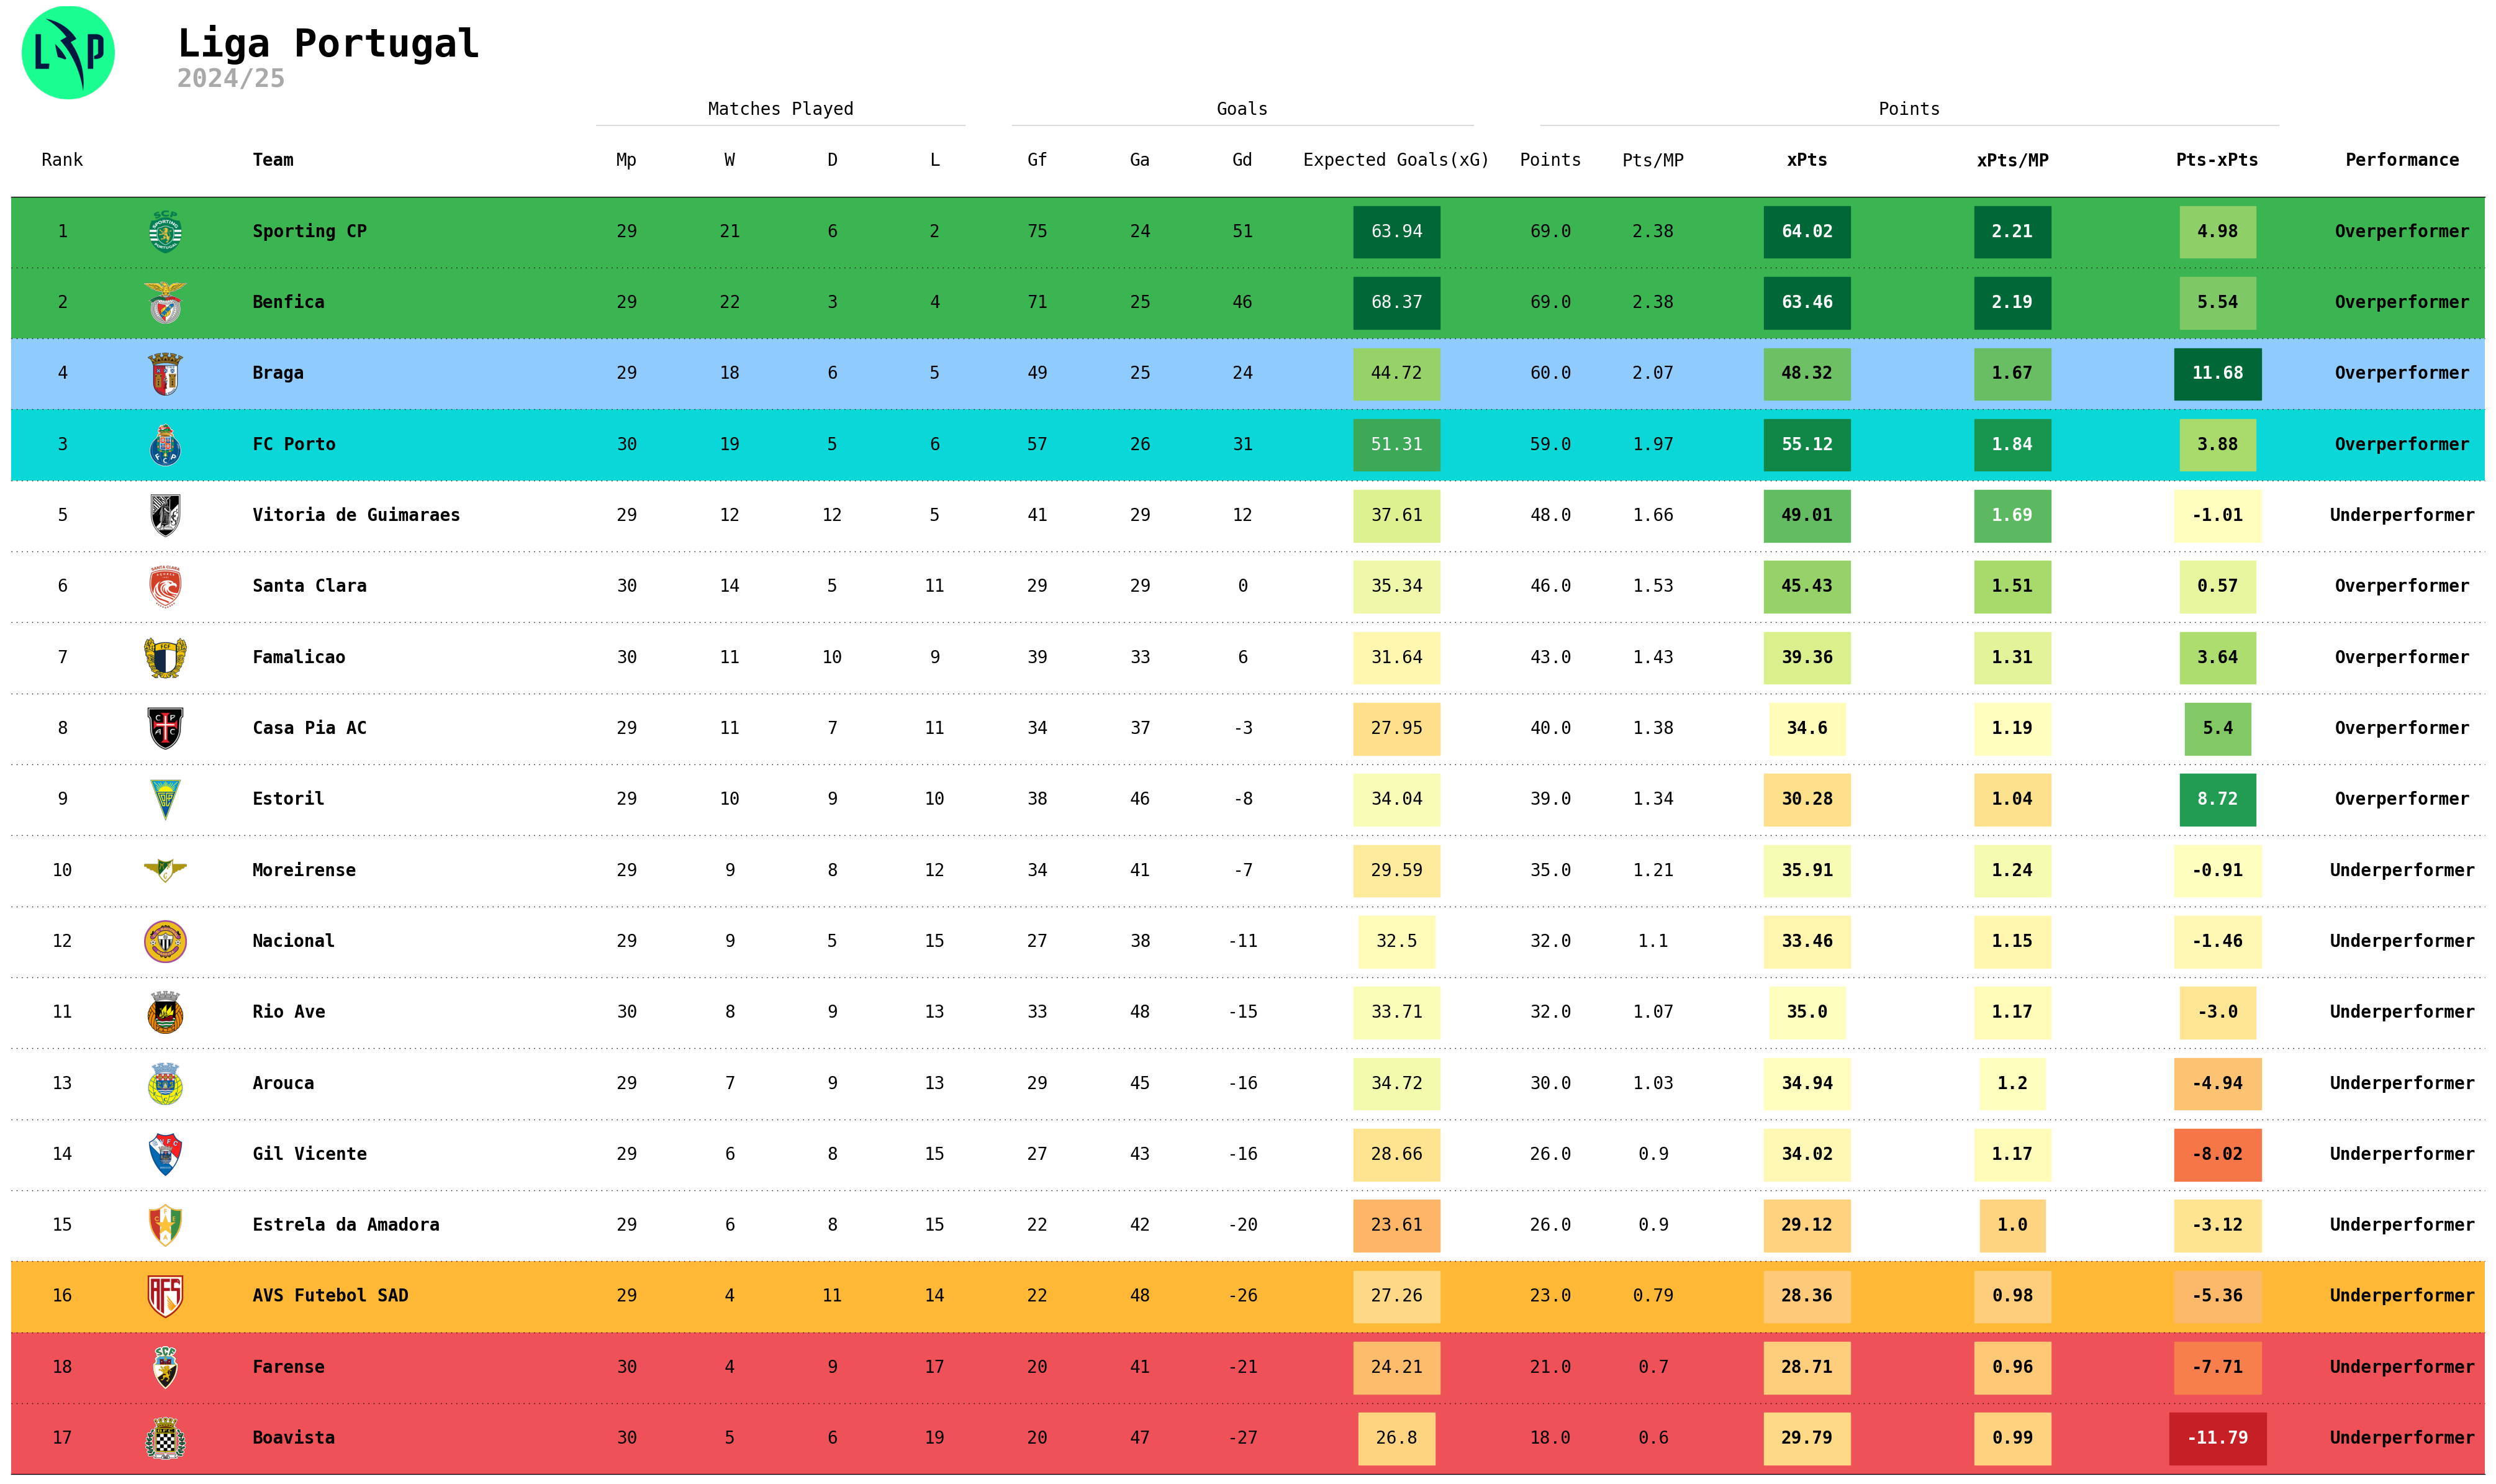

In [38]:
# create the table
fig, ax = plt.subplots(figsize=(50, 30))
plt.subplots_adjust(wspace=0, hspace=0.25, top=0.815, bottom=0.05, left=0.10, right=0.90)
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_plot,
    column_definitions=col_defs,
    index_col="Rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 20},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(
    colnames=["Expected Goals(xG)", "xPts", "xPts/MP", "Pts-xPts"]
)  # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x=0.155,
    y=0.83,
    s="Liga Portugal\n<2024/25>",
    highlight_textprops=[{"color": "darkgrey", "weight": "bold", "size": 30}],
    color="black",
    weight="bold",
    size=45,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

# fig_text(
#     x=0.29,
#     y=0.83,
#     s="Ranking by: <Expected Points (xPts)>",
#     highlight_textprops=[{"color": "black", "weight": "bold", "size": 45}],
#     color="darkgrey",
#     weight="bold",
#     size=45,
#     annotationbbox_kw={"xycoords": "figure fraction"},
# )

fotmob_url_liga_portugal = (
    "https://images.fotmob.com/image_resources/logo/leaguelogo/61.png"
)

logo_ax = fig.add_axes(
    [0.095, 0.79, 0.05, 0.05], zorder=1
)  # position and then size
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_liga_portugal}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1]:
    table.rows[idx].set_facecolor(row_colors["champions league"])

for idx in [2]:
    table.rows[idx].set_facecolor(row_colors["europa league quali."])

for idx in [3]:
    table.rows[idx].set_facecolor(row_colors["conference league quali."])

for idx in [15]:
    table.rows[idx].set_facecolor(row_colors["relegation play-off"])

for idx in [16, 17]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    
    
# === Save Visuals ===
save_dir = r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\03_Expected_Points_Modelling\media" # Change as needed
os.makedirs(save_dir, exist_ok=True)
save_path_bg = os.path.join(save_dir, "league_table_liga_portugal_2425.png")

plt.savefig(
    save_path_bg,
    dpi=300,
    facecolor="#ffffff",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)

Now, let's order using our newly modelled Expected Points.

In [32]:
df_plot.sort_values(by=['xPts'], ascending=False, inplace=True)

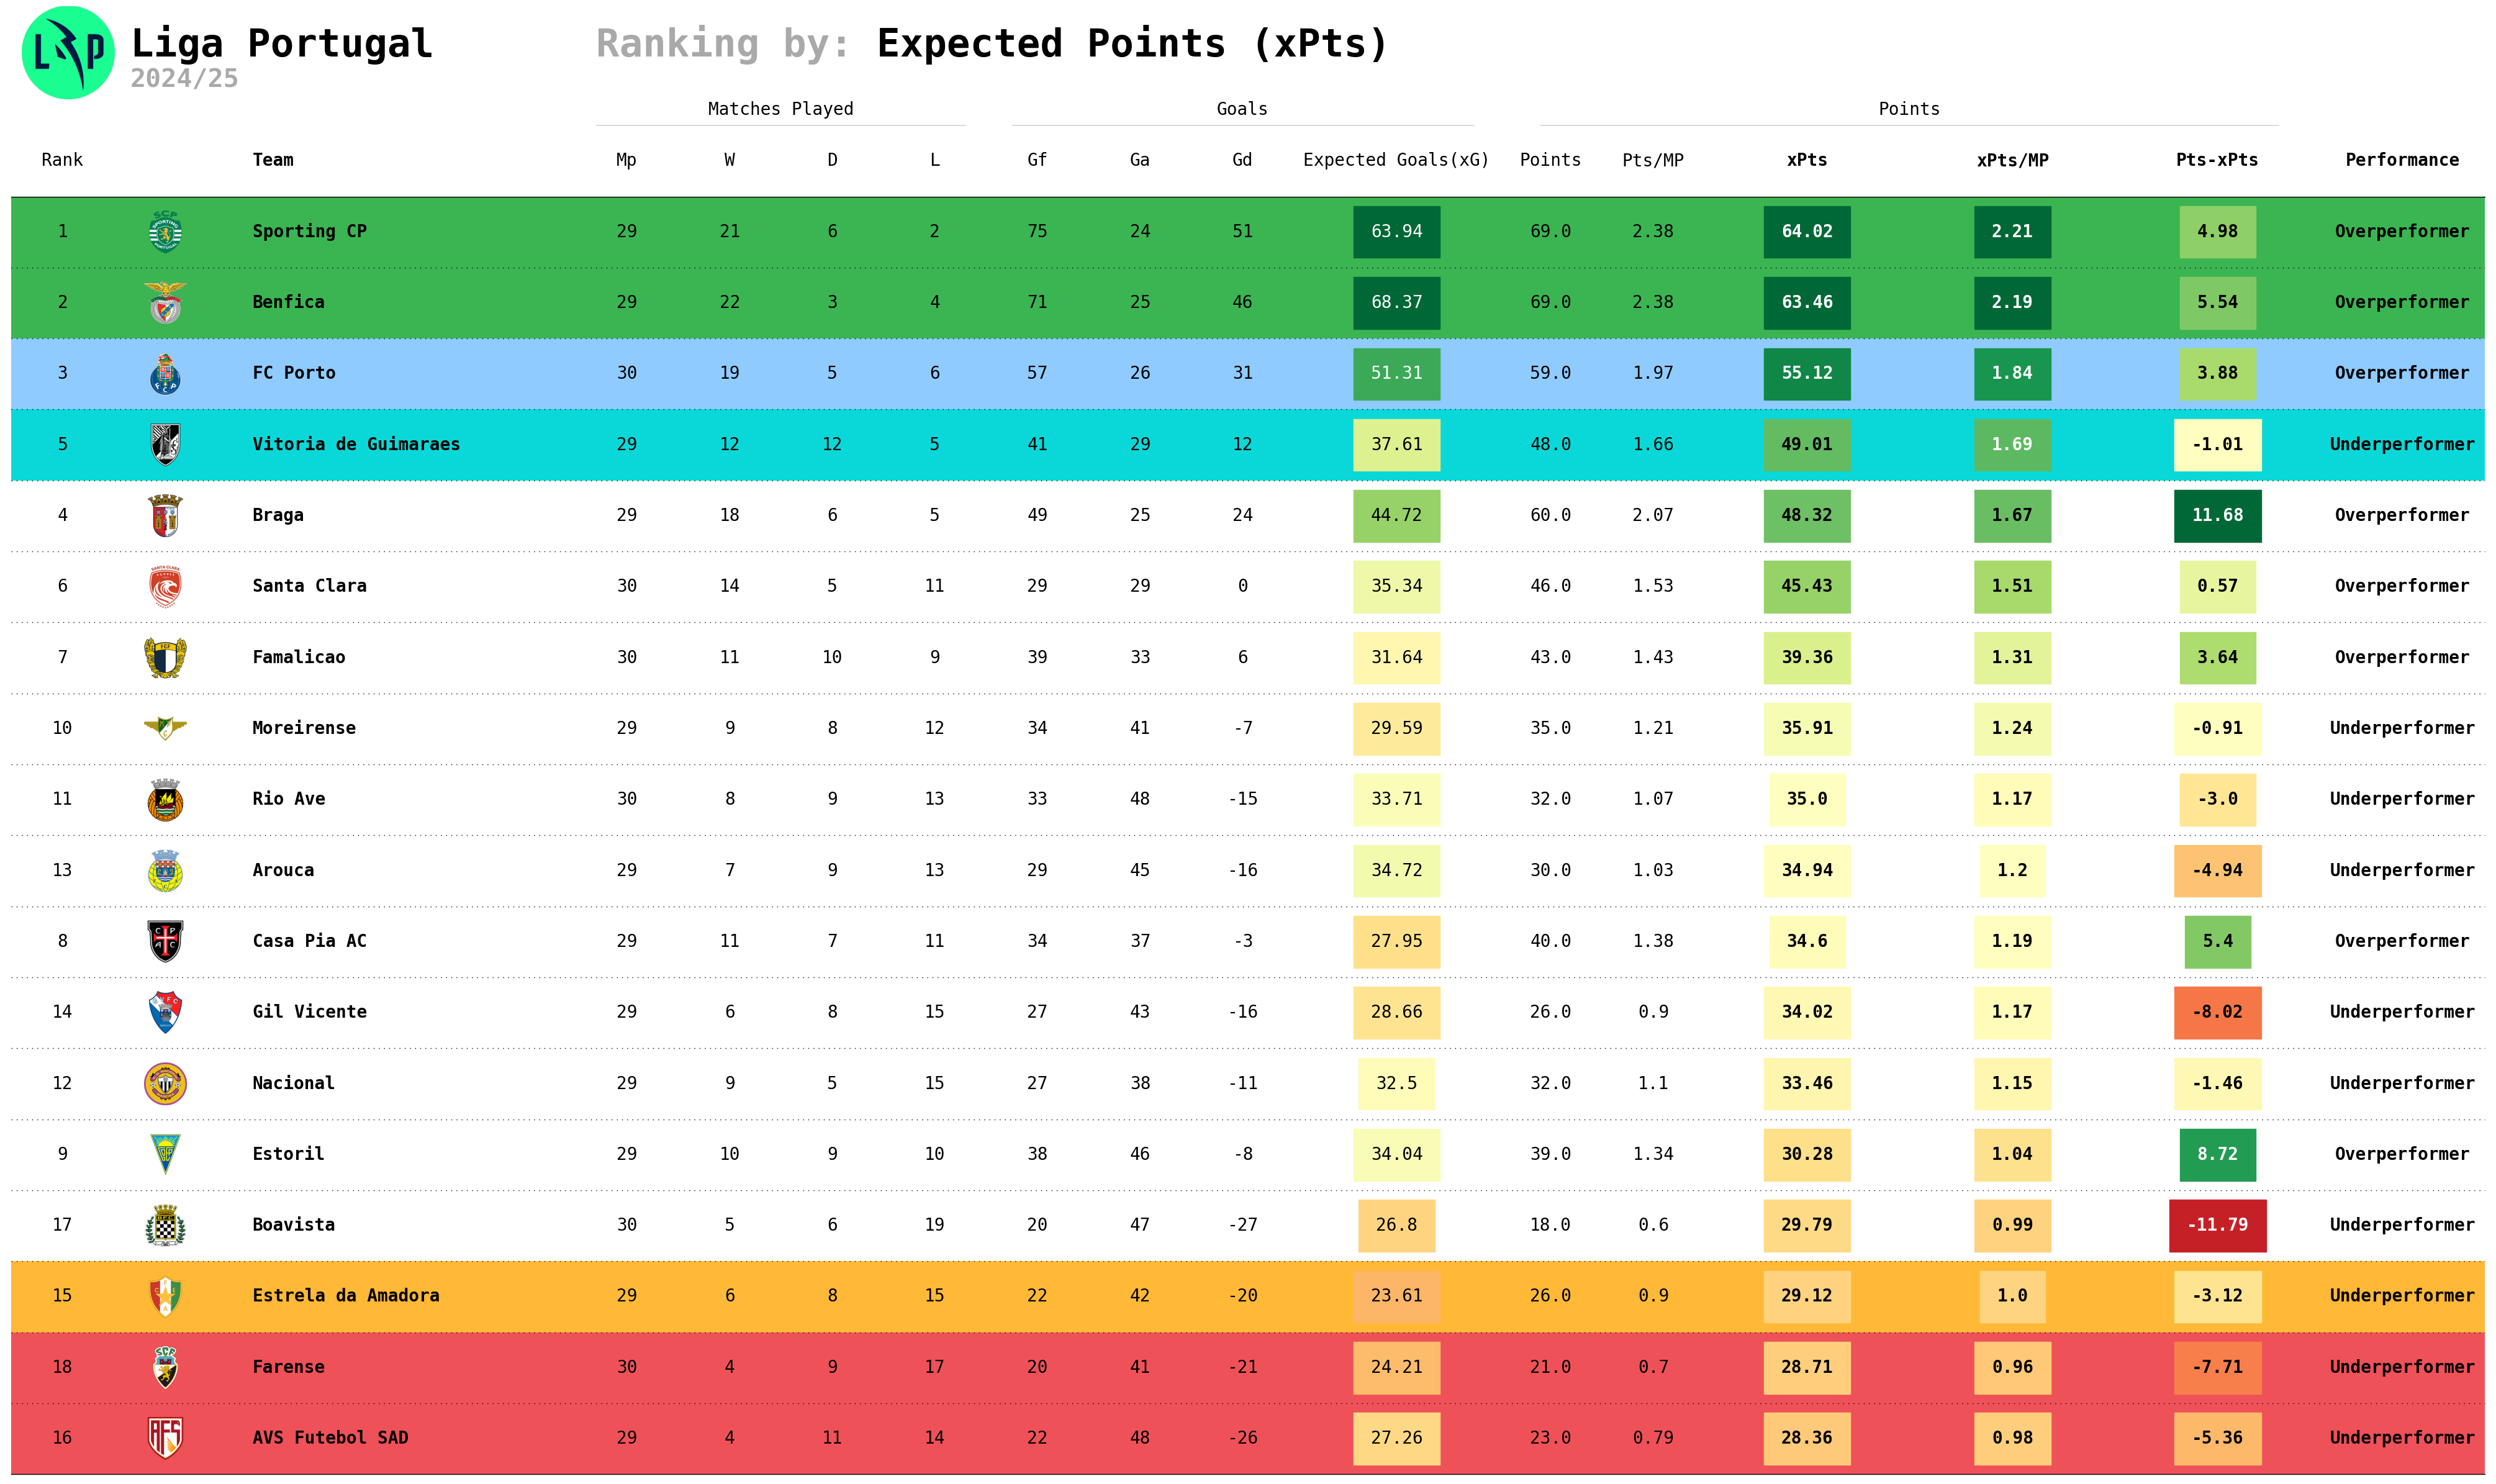

In [34]:
# create the table
fig, ax = plt.subplots(figsize=(50, 30))
plt.subplots_adjust(wspace=0, hspace=0.25, top=0.815, bottom=0.05, left=0.10, right=0.90)
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_plot,
    column_definitions=col_defs,
    index_col="Rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 20},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(
    colnames=["Expected Goals(xG)", "xPts", "xPts/MP", "Pts-xPts"]
)  # This will set the font color of the columns based on the cmap so the text is readable

# table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x=0.14,
    y=0.83,
    s="Liga Portugal\n<2024/25>",
    highlight_textprops=[{"color": "darkgrey", "weight": "bold", "size": 30}],
    color="black",
    weight="bold",
    size=45,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.29,
    y=0.83,
    s="Ranking by: <Expected Points (xPts)>",
    highlight_textprops=[{"color": "black", "weight": "bold", "size": 45}],
    color="darkgrey",
    weight="bold",
    size=45,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fotmob_url_liga_portugal = (
    "https://images.fotmob.com/image_resources/logo/leaguelogo/61.png"
)

logo_ax = fig.add_axes(
    [0.095, 0.79, 0.05, 0.05], zorder=1
)  # position and then size
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_liga_portugal}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1]:
    table.rows[idx].set_facecolor(row_colors["champions league"])

for idx in [2]:
    table.rows[idx].set_facecolor(row_colors["europa league quali."])

for idx in [3]:
    table.rows[idx].set_facecolor(row_colors["conference league quali."])

for idx in [15]:
    table.rows[idx].set_facecolor(row_colors["relegation play-off"])

for idx in [16, 17]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    
# === Save Visuals ===
save_dir = r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\03_Expected_Points_Modelling\media" # Change as needed
os.makedirs(save_dir, exist_ok=True)
save_path_bg = os.path.join(save_dir, "_xPts_league_table_liga_portugal_2425.png")

plt.savefig(
    save_path_bg,
    dpi=300,
    facecolor="#ffffff",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)

Finally, by sorting by the difference between the real points and the expected points

In [39]:
df_plot.sort_values(by=['Pts-xPts'], ascending=False, inplace=True)

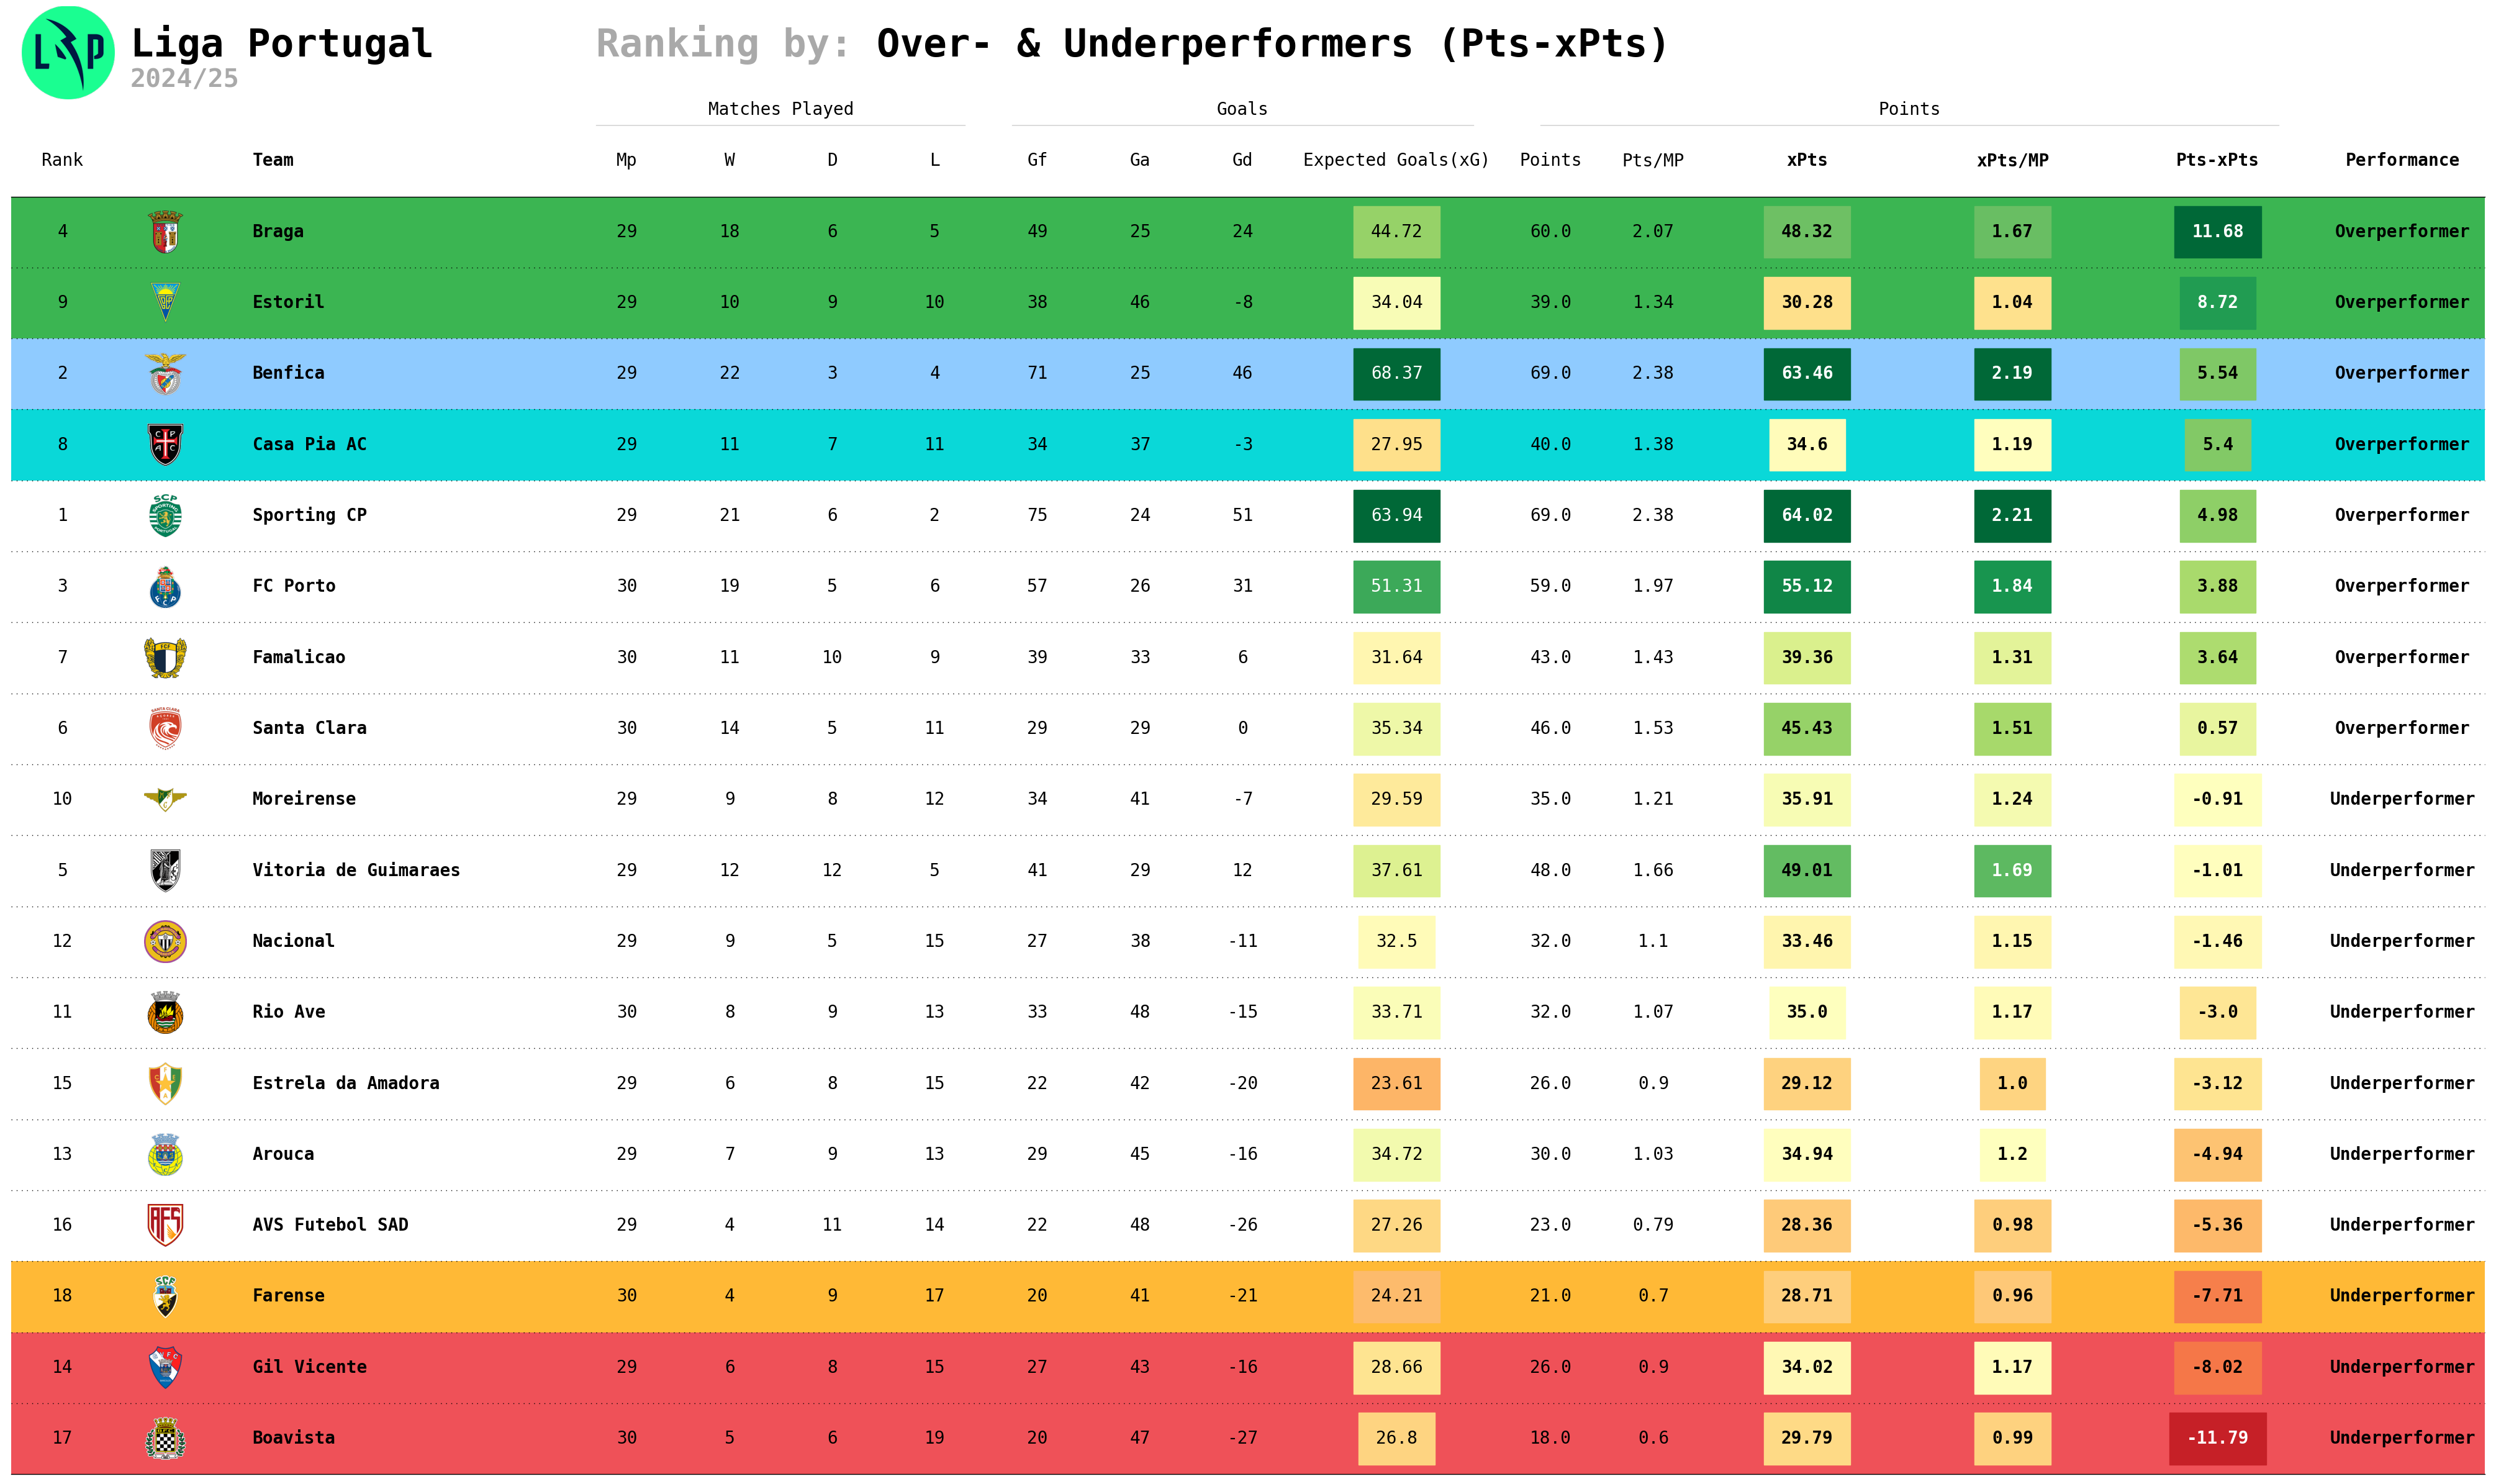

In [42]:
# create the table
fig, ax = plt.subplots(figsize=(50, 30))
plt.subplots_adjust(wspace=0, hspace=0.25, top=0.815, bottom=0.05, left=0.10, right=0.90)
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_plot,
    column_definitions=col_defs,
    index_col="Rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 20},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 0.5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(
    colnames=["Expected Goals(xG)", "xPts", "xPts/MP", "Pts-xPts"]
)  # This will set the font color of the columns based on the cmap so the text is readable

# table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x=0.14,
    y=0.83,
    s="Liga Portugal\n<2024/25>",
    highlight_textprops=[{"color": "darkgrey", "weight": "bold", "size": 30}],
    color="black",
    weight="bold",
    size=45,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.29,
    y=0.83,
    s="Ranking by: <Over- & Underperformers (Pts-xPts)>",
    highlight_textprops=[{"color": "black", "weight": "bold", "size": 45}],
    color="darkgrey",
    weight="bold",
    size=45,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fotmob_url_liga_portugal = (
    "https://images.fotmob.com/image_resources/logo/leaguelogo/61.png"
)

logo_ax = fig.add_axes(
    [0.095, 0.79, 0.05, 0.05], zorder=1
)  # position and then size
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_liga_portugal}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1]:
    table.rows[idx].set_facecolor(row_colors["champions league"])

for idx in [2]:
    table.rows[idx].set_facecolor(row_colors["europa league quali."])

for idx in [3]:
    table.rows[idx].set_facecolor(row_colors["conference league quali."])

for idx in [15]:
    table.rows[idx].set_facecolor(row_colors["relegation play-off"])

for idx in [16, 17]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    
# === Save Visuals ===
save_dir = r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\03_Expected_Points_Modelling\media" # Change as needed
os.makedirs(save_dir, exist_ok=True)
save_path_bg = os.path.join(save_dir, "Over_Underperformers_league_table_liga_portugal_2425.png")

plt.savefig(
    save_path_bg,
    dpi=300,
    facecolor="#ffffff",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)